# Εφαρμογή 3

In [1]:
import sympy as sym
from sympy import Matrix

from IPython.display import Image

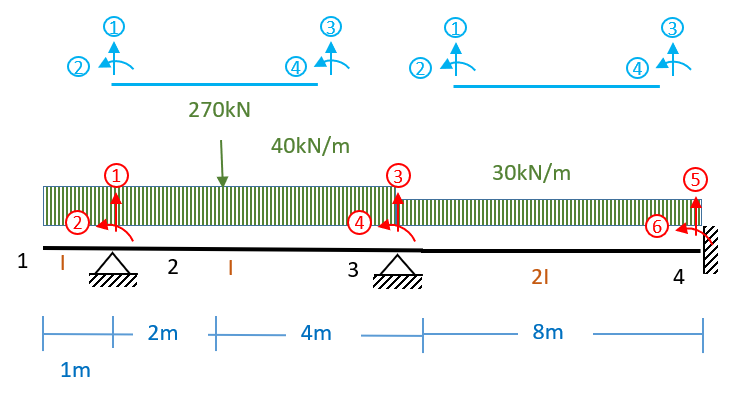

In [27]:
Image('https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example3/ekfonisi.png', width=600)

## Python functions

### Συναρτήσεις μητρώων στιβαρότητας

In [3]:
def K_with_axial(A: float, E: float, I: float, L: float) -> Matrix:
    """Return the stiffness matrix for an element with axial force.

    Args:
        A: Cross-sectional area of the element.
        E: Young's modulus of the element.
        I: Moment of inertia of the element.
        L: Length of the element.

    Returns:
        The stiffness matrix for the element.
    """
    k = Matrix([[A*E/L, 0, 0, -A*E/L, 0, 0],
                [0, 12*E*I/L**3, 6*E*I/L**2, 0, -12*E*I/L**3, 6*E*I/L**2],
                [0, 6*E*I/L**2, 4*E*I/L, 0, -6*E*I/L**2, 2*E*I/L],
                [-A*E/L, 0, 0, A*E/L, 0, 0],
                [0, -12*E*I/L**3, -6*E*I/L**2, 0, 12*E*I/L**3, -6*E*I/L**2],
                [0, 6*E*I/L**2, 2*E*I/L, 0, -6*E*I/L**2, 4*E*I/L]])
    return k


def K_without_axial(E: float, I: float, L: float) -> Matrix:
    """Return the stiffness matrix for an element with axial force.

    Args:
        E: Young's modulus of the element.
        I: Moment of inertia of the element.
        L: Length of the element.

    Returns:
        The stiffness matrix for the element.
    """
    k = Matrix([[12*E*I/L**3, 6*E*I/L**2, -12*E*I/L**3, 6*E*I/L**2],
        [6*E*I/L**2, 4*E*I/L, -6*E*I/L**2, 2*E*I/L],
        [-12*E*I/L**3, -6*E*I/L**2, 12*E*I/L**3, -6*E*I/L**2],
        [6*E*I/L**2, 2*E*I/L, -6*E*I/L**2, 4*E*I/L]])
    return k


### Συναρτήσεις μητρώων εξωτερικής φόρτισης

In [4]:
def P_uniformly_distributed_load(q: float, L: float) -> Matrix:
    """Return the force vector for a uniformly distributed load.

    Args:
        q: Load per unit length.
        L: Length of the element.

    Returns:
        The force vector for the element.
    """
    p = Matrix([[-q*L/2],
                [-q*L**2/12],
                [-q*L/2],
                [q*L**2/12]])
    return p

def P_point_load_at_distance_a(P: float, L: float, a: float) -> Matrix:
    """Return the force vector for a point load at distance a.

    Args:
        P: Point load.
        L: Length of the element.
        a: Distance from the start of the element.

    Returns:
        The force vector for the element.
    """
    b = L - a
    p = Matrix([[-P*b/L**3*(L**2 - a**2 + a*b)],
                [-P*a*b**2/L**2],
                [-(P*a/L**3)*(L**2 - b**2 + a*b)],
                [P*a**2*b/L**2]])
    return p

## Επίλυση

### Μητρώα στιβαρότητας

#### Μητρώο στιβαρότητας στοιχείου 1

In [5]:
K1 = K_without_axial(E=1.0, I=1.0, L=6.0)
K1

Matrix([
[ 0.0555555555555556,  0.166666666666667, -0.0555555555555556,  0.166666666666667],
[  0.166666666666667,  0.666666666666667,  -0.166666666666667,  0.333333333333333],
[-0.0555555555555556, -0.166666666666667,  0.0555555555555556, -0.166666666666667],
[  0.166666666666667,  0.333333333333333,  -0.166666666666667,  0.666666666666667]])

#### Μητρώο στιβαρότητας στοιχείου 2

In [6]:
K2 = K_without_axial(E=1.0, I=2.0, L=8.0)
K2

Matrix([
[ 0.046875,  0.1875, -0.046875,  0.1875],
[   0.1875,     1.0,   -0.1875,     0.5],
[-0.046875, -0.1875,  0.046875, -0.1875],
[   0.1875,     0.5,   -0.1875,     1.0]])

### Μητρώα εξωτερικών φορτίσεων

#### Μητρώο εξωτερικών φορτίσεων στοιχείου 1

Το στοιχείο 1 έχει τα εξωτερικά φορτία που μεταφέρονται από τον πρόβολο και επιπλέον αυτά που αναππτύσσονται λόγω του ομοιόμορφου φορτίου q και του σημειακού φορτίου P.

In [7]:
P1_point = P_point_load_at_distance_a(P=270.0, L=6.0, a=2.0)
P1_point

Matrix([
[-200.0],
[-240.0],
[ -70.0],
[ 120.0]])

In [8]:
P1_provolos = Matrix([[-40 * 1.0],
                    [40 * 1.0**2 / 2], 
                    [0],
                    [0]])
P1_provolos

Matrix([
[-40.0],
[ 20.0],
[    0],
[    0]])

In [9]:
P1_uniform = P_uniformly_distributed_load(q=40.0, L=6.0)
P1_uniform

Matrix([
[-120.0],
[-120.0],
[-120.0],
[ 120.0]])

οπότε το συνολικό μητρώο εξωτερικών φορτίσεων για το στοιχείο 1 είναι το άθροισμα των 3 παραπάνω μητρώων:

In [10]:
P1 = P1_point + P1_provolos + P1_uniform
P1

Matrix([
[-360.0],
[-340.0],
[-190.0],
[ 240.0]])

Το στοιχείο 2 φέρει τα φορτία μόνο του ομοιόμορφου φορτίου q.

In [11]:
P2 = P2_uniform = P_uniformly_distributed_load(q=30.0, L=8.0)
P2

Matrix([
[-120.0],
[-160.0],
[-120.0],
[ 160.0]])

### Μητρώο στιβαρότητας συνολικού φορέα

Είναι διαστάσεων 6x6 και δημιουργείται από το συνδυασμό των επιμέρους μητρώων, βάσει της αντιστοίχισης των βαθμών ελευθερίας στο καθολικό σύστημα συντεταγμένων

| Καθολ. Συστ. | (1) | (2) | (3) | (4) | (5) | (6) | 
|--------------|-----|-----|-----|-----|-----|-----|
| 1            |  1  |  2  |  3  | 4   |     |     |  
| 2            |     |     |  1  | 2   |  3  |  4  | 


#### Συνολικό μητρώο στιβαρότητας (συνδυασμός στοιχείων 1 και 2)


In [12]:
# Δημιουργώ αρχικά ένα μηδενικό μητρώο 6x6 με όλα τα στοιχεία του μηδενικά
K = sym.zeros(6, 6)
# Στη συνέχεια προσθέτω τις τιμές του K1 στις αντίστοιχες θέσεις του K 
# (από 0 έως 3 στην python δηλαδή 1 έως 4 με αρίθμηση ξεκινώντας από το 1)
K[:4, :4] += K1
# και ομοίως για το K2 στις θέσεις 2 έως 5 στην python (3 έως 6 με αρίθμηση από το 1)
K[2:, 2:] += K2
# Οπότε τελικά προκύπτει το συνολικό K
K

Matrix([
[ 0.0555555555555556,  0.166666666666667, -0.0555555555555556,  0.166666666666667,         0,       0],
[  0.166666666666667,  0.666666666666667,  -0.166666666666667,  0.333333333333333,         0,       0],
[-0.0555555555555556, -0.166666666666667,   0.102430555555556, 0.0208333333333333, -0.046875,  0.1875],
[  0.166666666666667,  0.333333333333333,  0.0208333333333333,   1.66666666666667,   -0.1875,     0.5],
[                  0,                  0,           -0.046875,            -0.1875,  0.046875, -0.1875],
[                  0,                  0,              0.1875,                0.5,   -0.1875,     1.0]])

#### Συνολικό μητρώο φορτίσεων
Το τελικό μητρώο φορτίσεων είναι διαστάσεων 6x1 και προκύπτει από την επαλληλία μητρώων των 2 παραπάνω στοιχείων:

In [13]:
# Δημιουργώ αρχικά ένα μηδενικό μητρώο 6x6 με όλα τα στοιχεία του μηδενικά
P = sym.zeros(6, 1)
# Στη συνέχεια προσθέτω τις τιμές του K1 στις αντίστοιχες θέσεις του K 
# (από 0 έως 3 στην python δηλαδή 1 έως 4 με αρίθμηση ξεκινώντας από το 1)
P[:4, 0] += P1
# και ομοίως για το K2 στις θέσεις 2 έως 5 στην python (3 έως 6 με αρίθμηση από το 1)
P[2:, 0] += P2
# Οπότε τελικά προκύπτει το συνολικό K
P

Matrix([
[-360.0],
[-340.0],
[-310.0],
[  80.0],
[-120.0],
[ 160.0]])

### Μητρώο παραμορφώσεων

Το μητρώο παραμορφώσεων U θα είναι διαστάσεων 6x1 (2 παραμορφώσεις: κατακόρυφη μετακίνηση και στροφή σε κάθε κόμβο).
Από τις συνθήκες στήριξης αναγνωρίζεται ότι οι μη μηδενικές τιμές θα είναι αυτές των U2 και U4.

In [14]:
U2, U4 = sym.symbols('U2 U4')
U = Matrix([[0], [U2], [0], [U4], [0], [0]])
U

Matrix([
[ 0],
[U2],
[ 0],
[U4],
[ 0],
[ 0]])

### Μητρώο αντιδράσεων

Το μητρώο αντιδράσεων R θα είναι διαστάσεων 6x1 (2 αντιδράσεις: κατακόρυφη δύναμη και ροπή σε κάθε κόμβο).
Από τις συνθήκες στήριξης αναγνωρίζεται ότι οι R2 και R4 θα έχουν μηδενικές τιμές.

In [15]:
R1, R3, R5, R6 = sym.symbols('R1 R3 R5 R6')
R = Matrix([[R1], [0], [R3], [0], [R5], [R6]])
R

Matrix([
[R1],
[ 0],
[R3],
[ 0],
[R5],
[R6]])

### Επίλυση

Στόχος είναι η επίλυση της μητρωικής εξίσωσης:

$ [k] \cdot [u] = [P] + [R]$

στην οποία όμως υπάρχουν 2 άγνωστοι, οι πίνακες $[u]$ και $[R]$.

Επιπλέον, παρατηρείται ότι το μητρώο στιβαρότητας δεν μπορεί να αντιστραφεί καθώς η ορίζουσά του είναι μηδενική.

In [16]:
# Υπολογισμός ορίζουσας του μητρώου στιβαρότητας
K.det()

0

### Αντικατάσταση γνωστών τιμών στα μητρώα αντιδράσεων και παραμορφώσεων

Με δεδομένο ότι είναι γνωστές οι μηδενικές τιμές των μητρώων αντιδράσεων και παραμορφώσεων, αρκεί η επίλυση να περιοριστεί μόνο στα υπομητρώα που σχετίζονται με τις μη μηδενικές τιμές των παραμορφώσεων και συγκεκριμένα στις γραμμές/στήλες 2 και 4.

### Διαχωρισμός σε υπομητρώα

In [17]:
k_24 = Matrix(K[[1, 3], [1,3]])
p_24 = Matrix(P[[1, 3], 0])
r_24 = Matrix(R[[1, 3], 0])
u_24 = Matrix(U[[1, 3], 0])


In [18]:
k_24

Matrix([
[0.666666666666667, 0.333333333333333],
[0.333333333333333,  1.66666666666667]])

In [19]:
r_24

Matrix([
[0],
[0]])

In [20]:
u_24

Matrix([
[U2],
[U4]])

In [21]:
p_24

Matrix([
[-340.0],
[  80.0]])

Από τον πολλαπλασιασμό των $ [k_{24}] \cdot [u_{24}]$ και την εξίσωση του γινομένου με το $[P_{24}]$ προκύπτει ένα σύστημα 2x2 εξισώσεων με 2 άγνωστους.

In [22]:
k_24 * u_24

Matrix([
[0.666666666666667*U2 + 0.333333333333333*U4],
[ 0.333333333333333*U2 + 1.66666666666667*U4]])

Από τη λύση του συστήματος προκύπτουν οι τιμές των παραμορφώσεων $U_2$ και $U_4$.

### Εναλλακτική επίλυση με πράξεις μητρώων


Η εξίσωση:

$ [k_{24}] \cdot [u_{24}] = [P_{24}] + [R_{24}]$

για μηδενικό $[R_{24}]$ μπορεί να γραφτεί και ως:

$ [k_{24}] \cdot [u_{24}] = [P_{24}]$

οπότε 

$ [k_{24}]^{-1}[k_{24}] \cdot [u_{24}] = [k_{24}]^{-1} \cdot [P_{24}]$

$ [u_{24}] = [k_{24}]^{-1} \cdot [P_{24}]$

Το μητρώο $[k_{24}]$ είναι πλέον αντιστρέψιμο

In [23]:
# Το αντίστροφο του μητρώου στιβαρότητας για τα στοιχεία 346
k_24.inv()

Matrix([
[  1.66666666666667, -0.333333333333333],
[-0.333333333333333,  0.666666666666667]])

In [24]:
u_24_solution = Matrix(k_24.inv() * p_24)
u_24_solution

Matrix([
[-593.333333333333],
[ 166.666666666667]])

Το παραπάνω αποτέλεσμα είναι οι τιμές του μητρώου $[u_{24}]$, άρα των παραμορφώσεων $U_2$ και $U_4$.

In [25]:
u_solution = U.subs(U2, u_24_solution[0]).subs(U4, u_24_solution[1])
u_solution

Matrix([
[                0],
[-593.333333333333],
[                0],
[ 166.666666666667],
[                0],
[                0]])

Η αρχική μητρωική εξίσωση έχει πλέον ως μόνο άγνωστο το μητρώο [R]:

$ [k] \cdot [u] = [P] + [R]$

οπότε:

$[R] = [k] \cdot [u] - [P]$

In [26]:
r_solution = Matrix(K * u_solution - P)
r_solution


Matrix([
[ 288.888888888889],
[                0],
[ 412.361111111111],
[                0],
[            88.75],
[-76.6666666666667]])